# LINEAR REGRESSION MODELS

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
cars = pd.read_csv("car data.csv")

This is Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on website cardekho.com. We are going to use for finding predictions of price with the use of regression models.

The datasets consist of several independent variables include:

Car_Name : This column should be filled with the name of the car.

Year : This column should be filled with the year in which the car was bought.

Selling_Price : This column should be filled with the price the owner wants to sell the car at.

Present_Price : This is the current ex-showroom price of the car.

Kms_Driven : This is the distance completed by the car in km.
 
Fuel_Type : Fuel type of the car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had.

In [3]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
cars.shape

(301, 9)

In [5]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are all non null values present in the columns

In this regression model the dependent variable will be 'Selling_price' rest all the variables will be considered as independent variables


For buliding linear regression model we need all numerical variables,so the features containing object datatype are either converted or dropped

In [7]:
#Car_Name

cars.Car_Name.value_counts()

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
                 ..
KTM RC390         1
TVS Jupyter       1
Bajaj  ct 100     1
omni              1
800               1
Name: Car_Name, Length: 98, dtype: int64

Car_Name contains 98 different values so it is better to drop this column

In [8]:
cars.drop(['Car_Name'],axis=1,inplace = True)

In [9]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### EDA

#### UNIVARIATE ANALYSIS

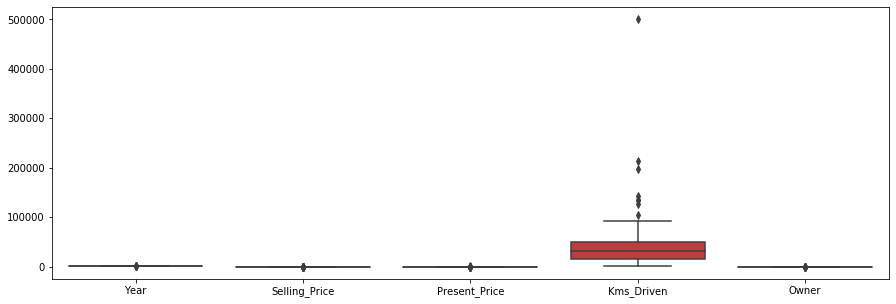

In [10]:
# Year

plt.figure(figsize = (15,5))
sns.boxplot(data=cars)
plt.show()

In [11]:
# from the boxplot we can see that kms_Driven has outliers

In [12]:
q1 = cars['Kms_Driven'].quantile(0.25)
q3 = cars['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

33767.0 99417.5 -35650.5


In [13]:
cars[cars['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [14]:
cars[cars['Kms_Driven']>UL].count()['Kms_Driven']

8

These 8 values are greater than the upper limit value 99417.5

We would remove these values

In [15]:
#outlier removal from Kms_Driven

df = cars[cars['Kms_Driven']<UL]
cars=df
cars

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


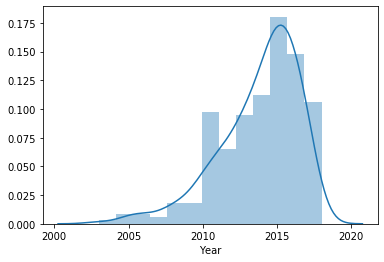

In [16]:
sns.distplot(df['Year'])

In [17]:
# The Years variable is left skewed

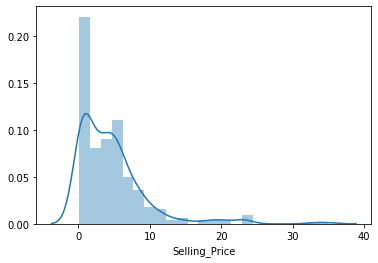

In [18]:
sns.distplot(df['Selling_Price'])
plt.show()

In [19]:
# the selling price is right skewed

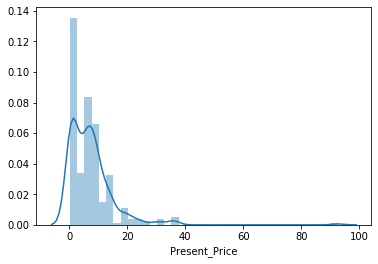

In [20]:
sns.distplot(df['Present_Price'])
plt.show()

In [21]:
#the present_price is right skewed

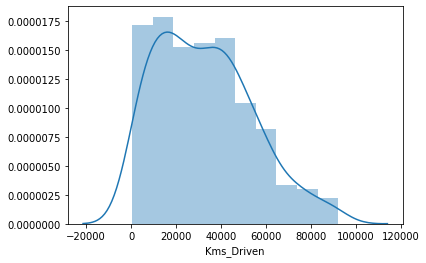

In [22]:
sns.distplot(df['Kms_Driven'])
plt.show()

In [23]:
#The Kms_Driven are almost normally distributed after removing the outliers, the max values lie between 20000 to 50000
#kms

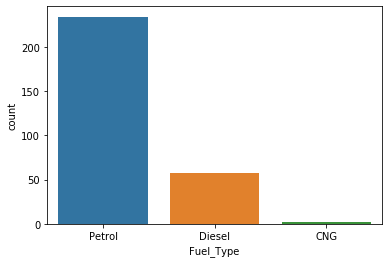

In [24]:
sns.countplot(cars['Fuel_Type'])
plt.show()

In [25]:
# From this bar plot we can see that there are three categories of Fuel_Type
#Petrol Fuel_type is the maximum in number and CNG cars are the least

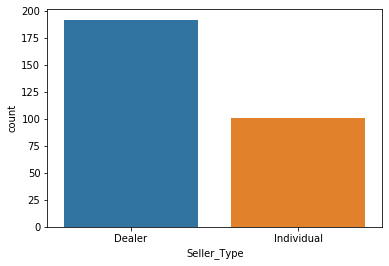

In [26]:
sns.countplot(cars['Seller_Type'])
plt.show()

In [27]:
# There are two types of sellers : Individual and Dealer
# The seller_type dealer is greater than the individual seller_type

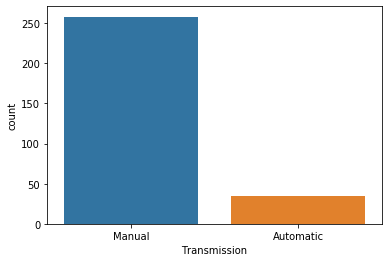

In [28]:
sns.countplot(cars['Transmission'])
plt.show()

In [29]:
# The Transmission feature has 2 categories
#Manual and Automatic

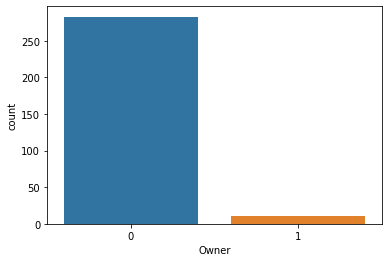

In [30]:
sns.countplot(cars['Owner'])
plt.show()

In [31]:
# The cars having 0 previous owners is more than the cars having one previous owner.

#### Bivarate  analysis

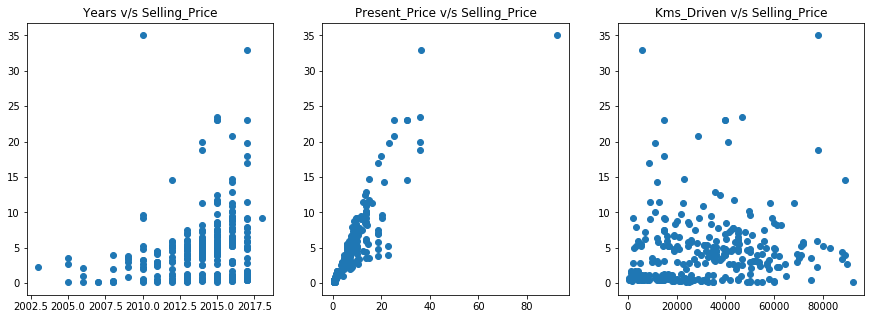

In [32]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

#scatter plot 1
ax1.scatter(x=cars['Year'],y= cars['Selling_Price'])
ax1.set_title('Years v/s Selling_Price')

#scatter plot 2
ax2.scatter(x=cars['Present_Price'], y=cars['Selling_Price']) 
ax2.set_title('Present_Price v/s Selling_Price')

#scatter plot 3
ax3.scatter(x=cars['Kms_Driven'],y=cars['Selling_Price'])
ax3.set_title('Kms_Driven v/s Selling_Price')

plt.draw()  

OR

1. The older the car the lesser the selling price
2. The selling price of those cars is greater whose current ex-showroom price(present_price) is greater i.e the present_price and sellin_price is directly proportional.
3. As the Km_Driven increases the Selling_price of the car decreases 

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

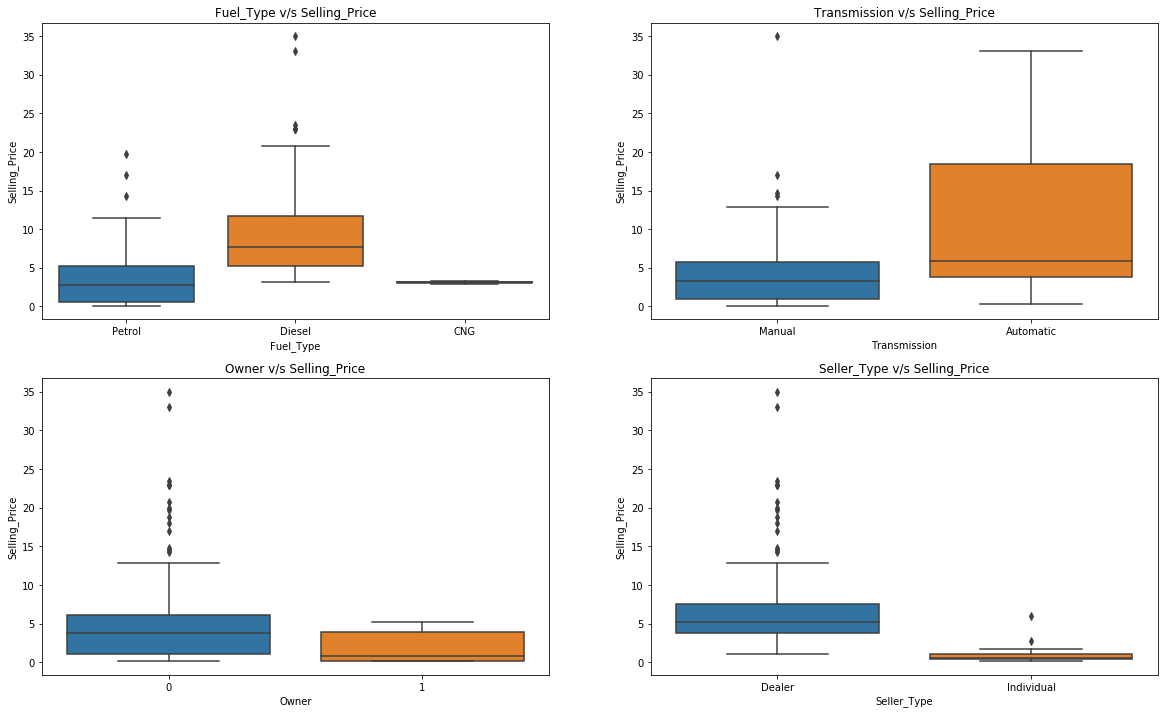

In [33]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=cars.Fuel_Type,y=cars.Selling_Price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=cars.Transmission,y=cars.Selling_Price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=cars.Owner,y=cars.Selling_Price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=cars.Seller_Type,y=cars.Selling_Price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

1. The Diesel cars are having the highest selling_price with most number of outliers being present.
   Diesel > CNG > Petrol in terms of seeling price
2. Automatic cars are expesnive than manual cars
3. The cars with no previous owner are expensive than with a previous owner.
4. Individuals are selling there cars at lesser price than the cars being sold by the dealers

#### Multivariate Analysis

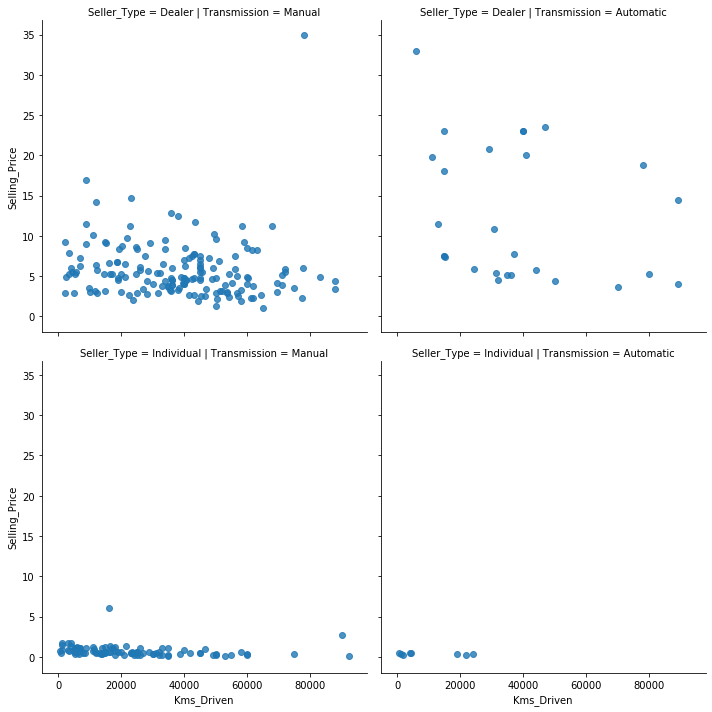

In [34]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type')   
plt.show()

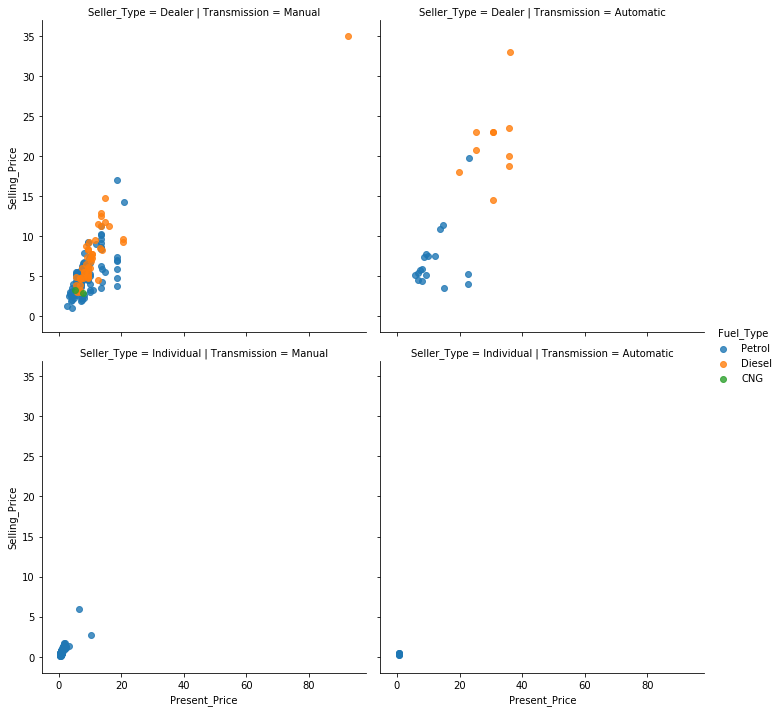

In [35]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type',hue='Fuel_Type')   
plt.show()

1. All the individual seller_type are having only petrol cars.
2. Dealers selling manual transmission cars are selling all the 3 types of fuel cars, most expensive being the diesel cars

#### Converting categorical variables to dummy variables

In [36]:
#Fuel_Type

cars.Fuel_Type.value_counts()

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [37]:
cars.Seller_Type.value_counts()

Dealer        192
Individual    101
Name: Seller_Type, dtype: int64

In [38]:
cars.Transmission.value_counts()

Manual       258
Automatic     35
Name: Transmission, dtype: int64

In [39]:
cars = pd.get_dummies(cars,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 9 columns):
Year                      293 non-null int64
Selling_Price             293 non-null float64
Present_Price             293 non-null float64
Kms_Driven                293 non-null int64
Owner                     293 non-null int64
Fuel_Type_Diesel          293 non-null uint8
Fuel_Type_Petrol          293 non-null uint8
Seller_Type_Individual    293 non-null uint8
Transmission_Manual       293 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 24.9 KB


In [41]:
cars.shape

(293, 9)

In [42]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


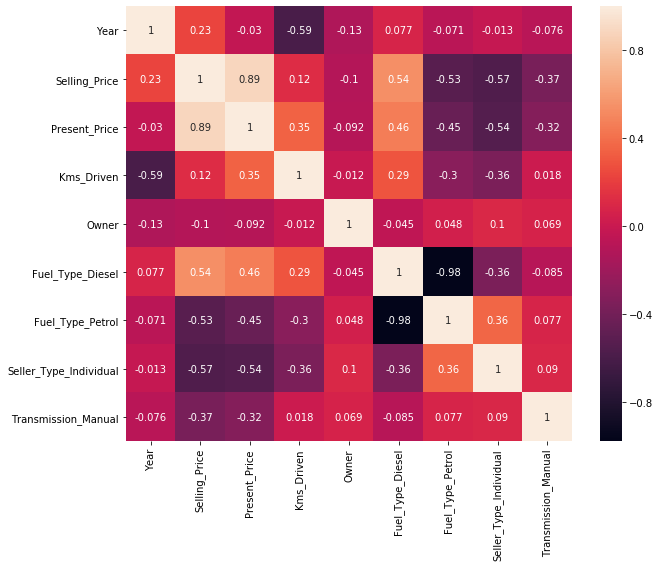

In [43]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable Selling Price is highly correlated with:
1. Present Price
2. Fuel Type
3. Seller Type

### Linear Regression Model

The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable.

The linear regression equation can be expressed in the following form:

y = a1x1 + a2x2 + a3x3 + ..... + anxn + b

* y is the target variable.
* x1, x2, x3,...xn are the features.
* a1, a2, a3,..., an are the coefficients.
* b is the parameter of the model.

In [44]:
y = cars['Selling_Price']
X = cars.drop(['Selling_Price'],axis=1)

In [49]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 8)
(88, 8)
(88,)


In [50]:
#standardization of the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

X_test=sc.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [51]:
#Building model using sklearn(Gradient Descent)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])  
#print(coeff_df)

#Now predicting on the test data

y_pred = lin_reg.predict(X_test)

coefficients:
 [ 0.79921826  3.98239214 -0.84029775  0.1167908   0.94778882  0.07567184
 -0.82638412 -0.75632031]

 intercept: 4.90141463414633


In [52]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,0.60,0.943759
1,8.65,10.018852
2,0.35,2.474121
3,4.75,7.019839
4,1.10,-0.200621
...,...,...
83,0.45,3.362738
84,7.50,11.201648
85,7.40,9.511781
86,0.60,0.080892


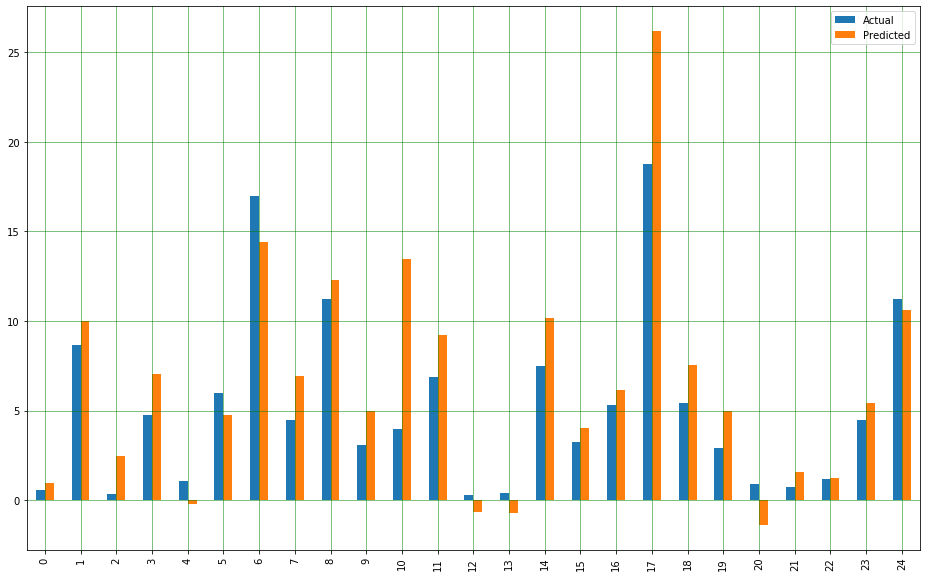

In [53]:
#Showing the difference between the actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [98]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

#or
#print('rsquare_Train', lin_reg.score(X_train, y_train))
#print('rsquare_Test', lin_reg.score(X_test, y_test)) 

Mean Absolute Error: 1.5717645666078972
Mean Squared Error: 4.549905681004936
Root Mean Squared Error: 2.1330507919421273
r2_score: 0.7346877394645628


In [55]:
# Building a linear Regression model using statsmodels (OLS)

In [57]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

y = cars['Selling_Price']
X = cars.drop(['Selling_Price'],axis=1)
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     301.8
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          5.17e-134
Time:                        12:15:37   Log-Likelihood:                -559.84
No. Observations:                 293   AIC:                             1138.
Df Residuals:                     284   BIC:                             1171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -542

### Assumptions

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

#### Assumption 1- No autocorrelation


In [58]:
# 1. Durbin Watson Test

#Ho: Linear Regression Residuals are not correlated
#H1: Errors are correlated.

from statsmodels.stats.api import durbin_watson
durbin_watson(model.resid)

1.9066241806857904

From summary also we can see the durbin watson value ,this is v close to 2 which indicates no autocorrelation

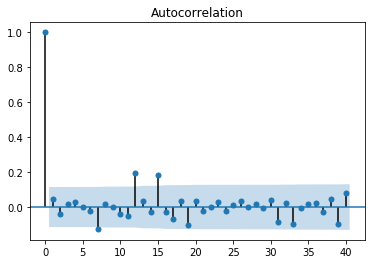

In [59]:
#2. time series analysis graph 

import statsmodels.tsa.api as smt #tsa time series anlaysis

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05) #model.resid comes from statsmodel 
acf.show()

# from this graph we dont see any pattern in the residuals so this shows no autocorrelation


#### Assumption 2- Normality of Residuals

In [60]:
#1. Jarque berua test

from scipy import stats
print(stats.jarque_bera(model.resid))

#ho : the data is normally distributed
#h1: the errors are not normally distributed

(609.8115535577048, 0.0)


pvalue (0) < alpha (0.05)
so we reject the null hypothesis 
the errors are not normally distributed

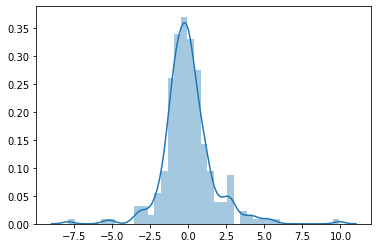

In [61]:
#2. Histogram

import seaborn as sns

sns.distplot(model.resid)

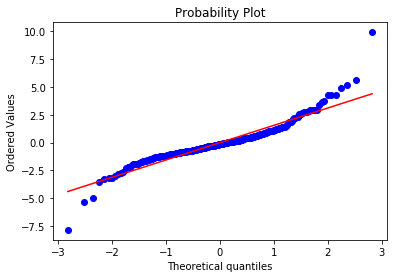

In [62]:
#3. QQ plot

import pylab

stats.probplot(model.resid, dist = 'norm', plot = pylab)
plt.show()

In [63]:
#4. shapiro wilk test

# Ho: The Data / Errors are Normal in Nature
# H1: The Data is not Normal

from scipy.stats import shapiro

teststats, pvalue = shapiro(model.resid)
print(pvalue)
print("reject the null ho")

4.787068636456782e-13
reject the null ho


#### Asssumption 3 - Linearity of residuals

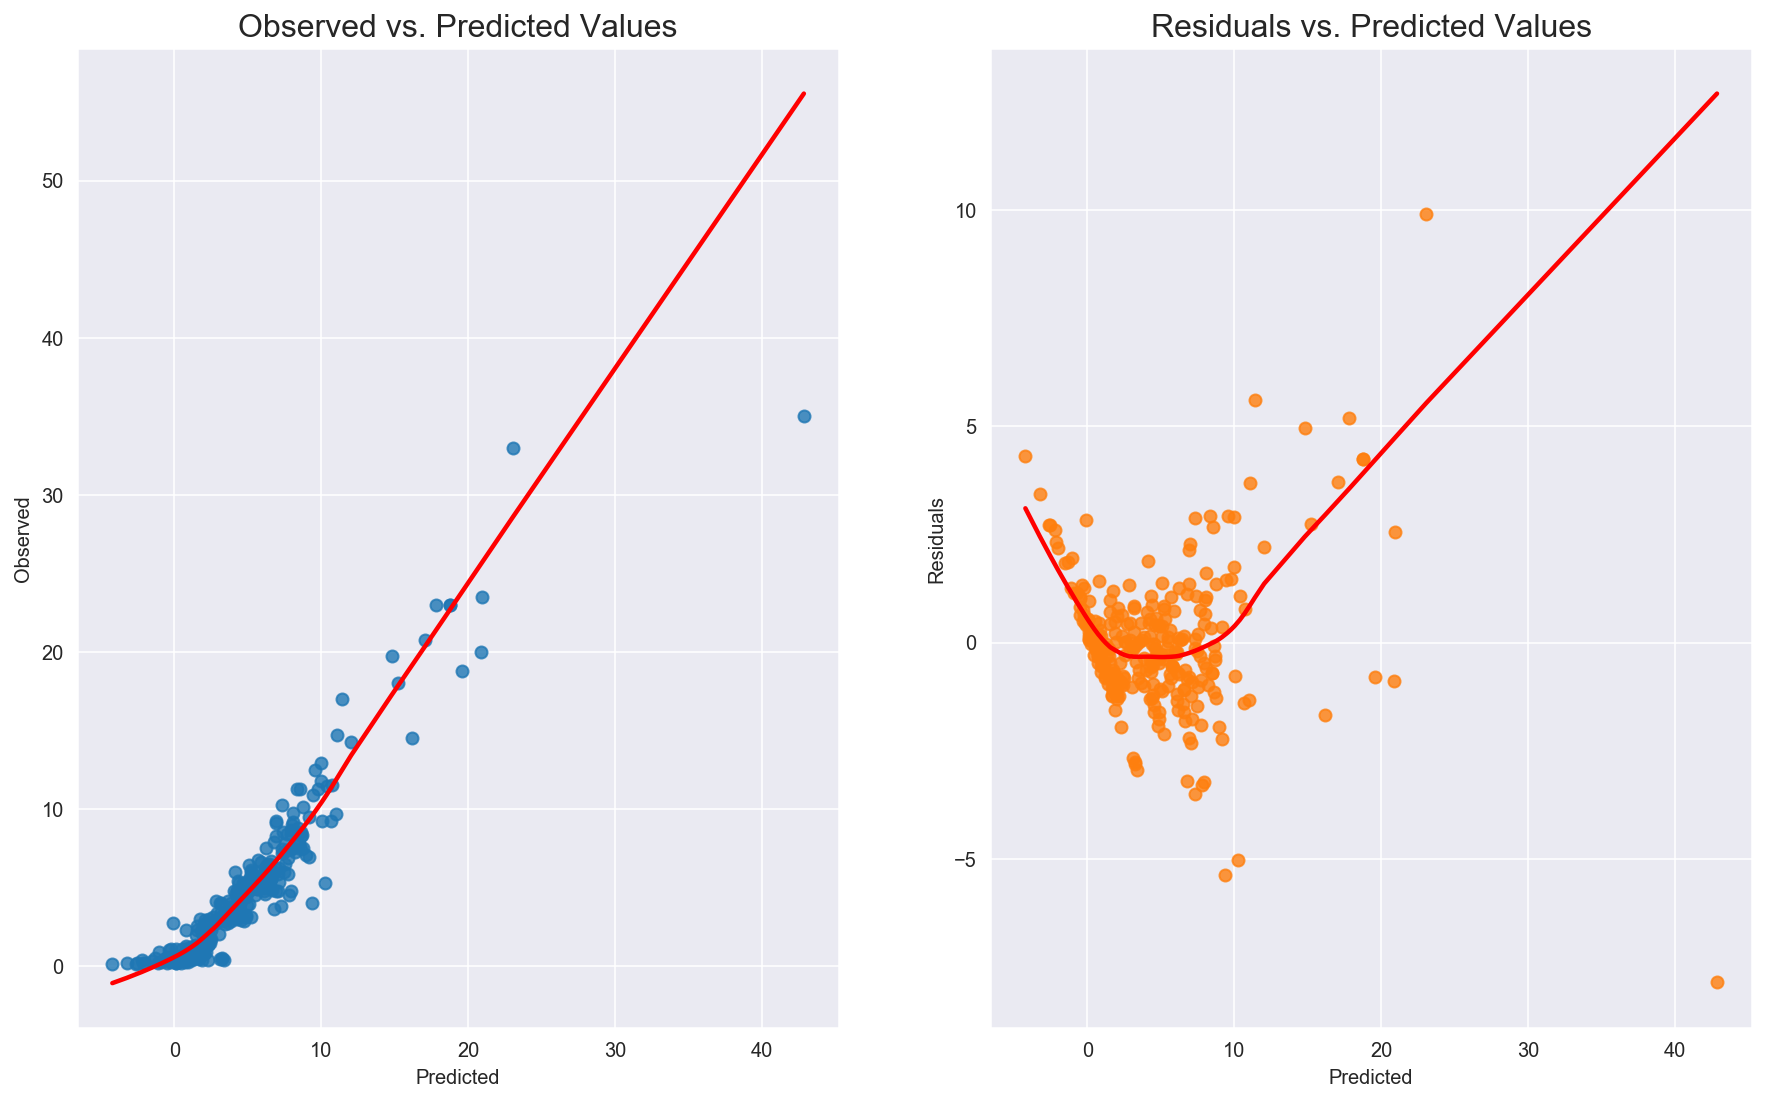

In [64]:
#1. Visual representation

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    #LOWESS (Locally Weighted Scatterplot Smoothing) is a popular tool used in regression analysis that creates a smooth line 
    #through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)

In [65]:
#2. Rainbow test

import statsmodels.api as sm
sm.stats.linear_rainbow(res=model, frac=0.5)
# frac : we are not checking the whole data we are just checking the fraction of it

(1.2020762277949428, 0.13731368022962437)

#### Assumption 4 - Homoscedasticity_test

In [66]:
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.compat import lzip


In [67]:
#1. Goldfeld Quandt Test:

# Ho: The residuals are not heteroscedastic / same variance / homoscedastic
# H1: The residuals are Heteroscedastic / unequal variance

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

#exog - x varibles and endog - y variables

[('F statistic', 0.2596416760264984), ('p-value', 0.9999999999999876)]

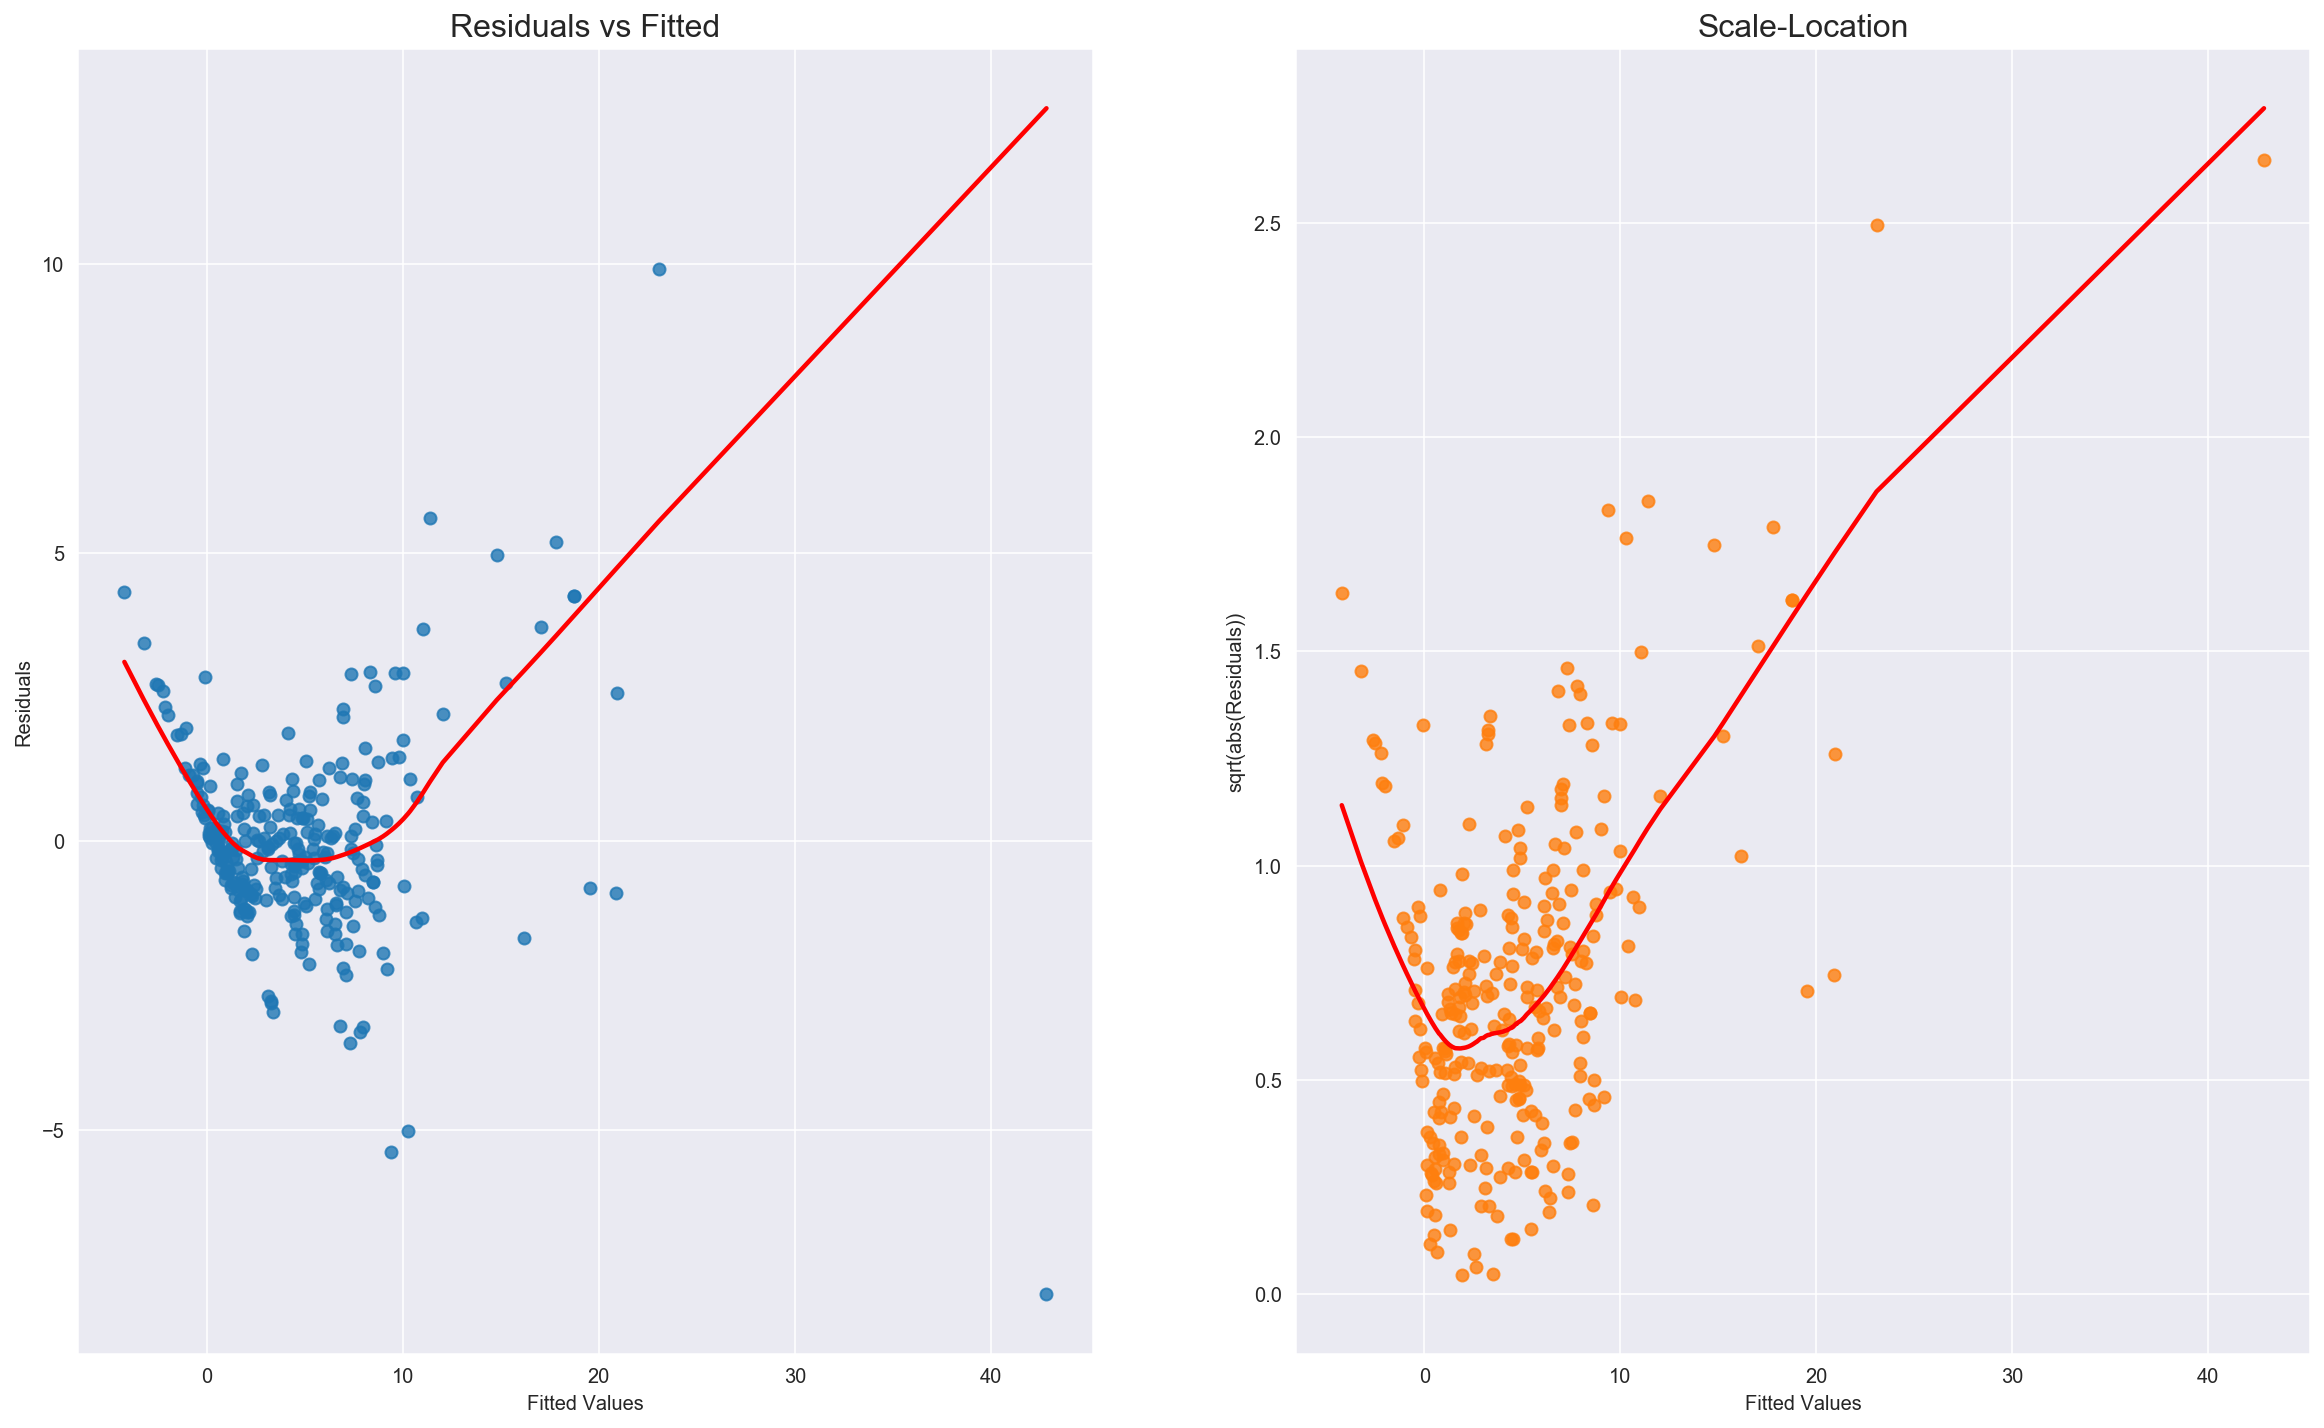

In [68]:
#2. Visual representation

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2,figsize=(20,12))

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

plt.show()

#### Assumption 5- NO MULTI COLLINEARITY

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
df = pd.DataFrame({'vif': vif[1:]}, index=X.columns)
df

,vif
Year,1.855344
Present_Price,1.837928
Kms_Driven,2.202238
Owner,1.036110
Fuel_Type_Diesel,24.128242
Fuel_Type_Petrol,23.982198
Seller_Type_Individual,1.583834
Transmission_Manual,1.146456


In [70]:
df[df.vif > 5].index

Index(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')

In [71]:
## After removing multicollinear feature 'Fuel_Type_Diesel'....cars1
cars1 = cars
cars1.drop(['Fuel_Type_Diesel'],axis=1,inplace=True)

X_vif = cars1.drop(['Selling_Price'],axis=1)
y_vif = cars1['Selling_Price']
from sklearn.linear_model import LinearRegression

lin_reg_vif = LinearRegression()
lin_reg_vif.fit(X, y)

print(f'Coefficients: {lin_reg_vif.coef_}')
print(f'Intercept: {lin_reg_vif.intercept_}')
print(f'R^2 score: {lin_reg_vif.score(X, y)}')

Coefficients: [ 2.71256264e-01  4.55618331e-01 -3.59343507e-05  3.90606193e-01
  2.55936877e+00  4.16137467e-01 -1.46936499e+00 -1.42713508e+00]
Intercept: -542.8983588011639
R^2 score: 0.8947414796898793


In [77]:
## After removing multicollinear feature 'Fuel_Type_Diesel'

import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X = cars1.drop(['Selling_Price'],axis=1)
y = cars1['Selling_Price']

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     340.0
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.53e-134
Time:                        12:16:29   Log-Likelihood:                -562.15
No. Observations:                 293   AIC:                             1140.
Df Residuals:                     285   BIC:                             1170.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0018      0.004     -0.474      0.636      -0.009       0.006
Year                    9.078e-07      0.001      0.001      0.999      -0.001       0.001
Present_Price           1.502e-06      0.084   1.78e-05      1.000      -0.166       0.166
Kms_Driven              -1.16e-10    1.2e-05  -9.66e-06      1.000   -2.36e-05    2.36e-05
Owner                   1.359e-06      0.542   2.51e-06      1.000      -1.067       1.067
Fuel_Type_Petrol        -6.64e-06      0.517  -1.28e-05      1.000      -1.018       1.018
Seller_Type_Individual -4.711e-06      0.400  -1.18e-05      1.000      -0.786       0.786
Transmission_Manual    -4.692e-06      0.418  -1.12e-05      1.000      -0.824       0.824
predictions                1.0000      0.180      5.541      0.000       0.645       1.355
==============================================================================
Omnibus:                       72.442   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.611
Skew:                           0.728   Prob(JB):                    4.62e-130
Kurtosis:                       9.831   Cond. No.                     1.02e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,predictions
vif,inf,inf,inf,inf,inf,inf,inf,inf


In [79]:
#After checking the assumptions found that Normality criteria not met

# we will apply transformation on the data to make the data meet the assumption

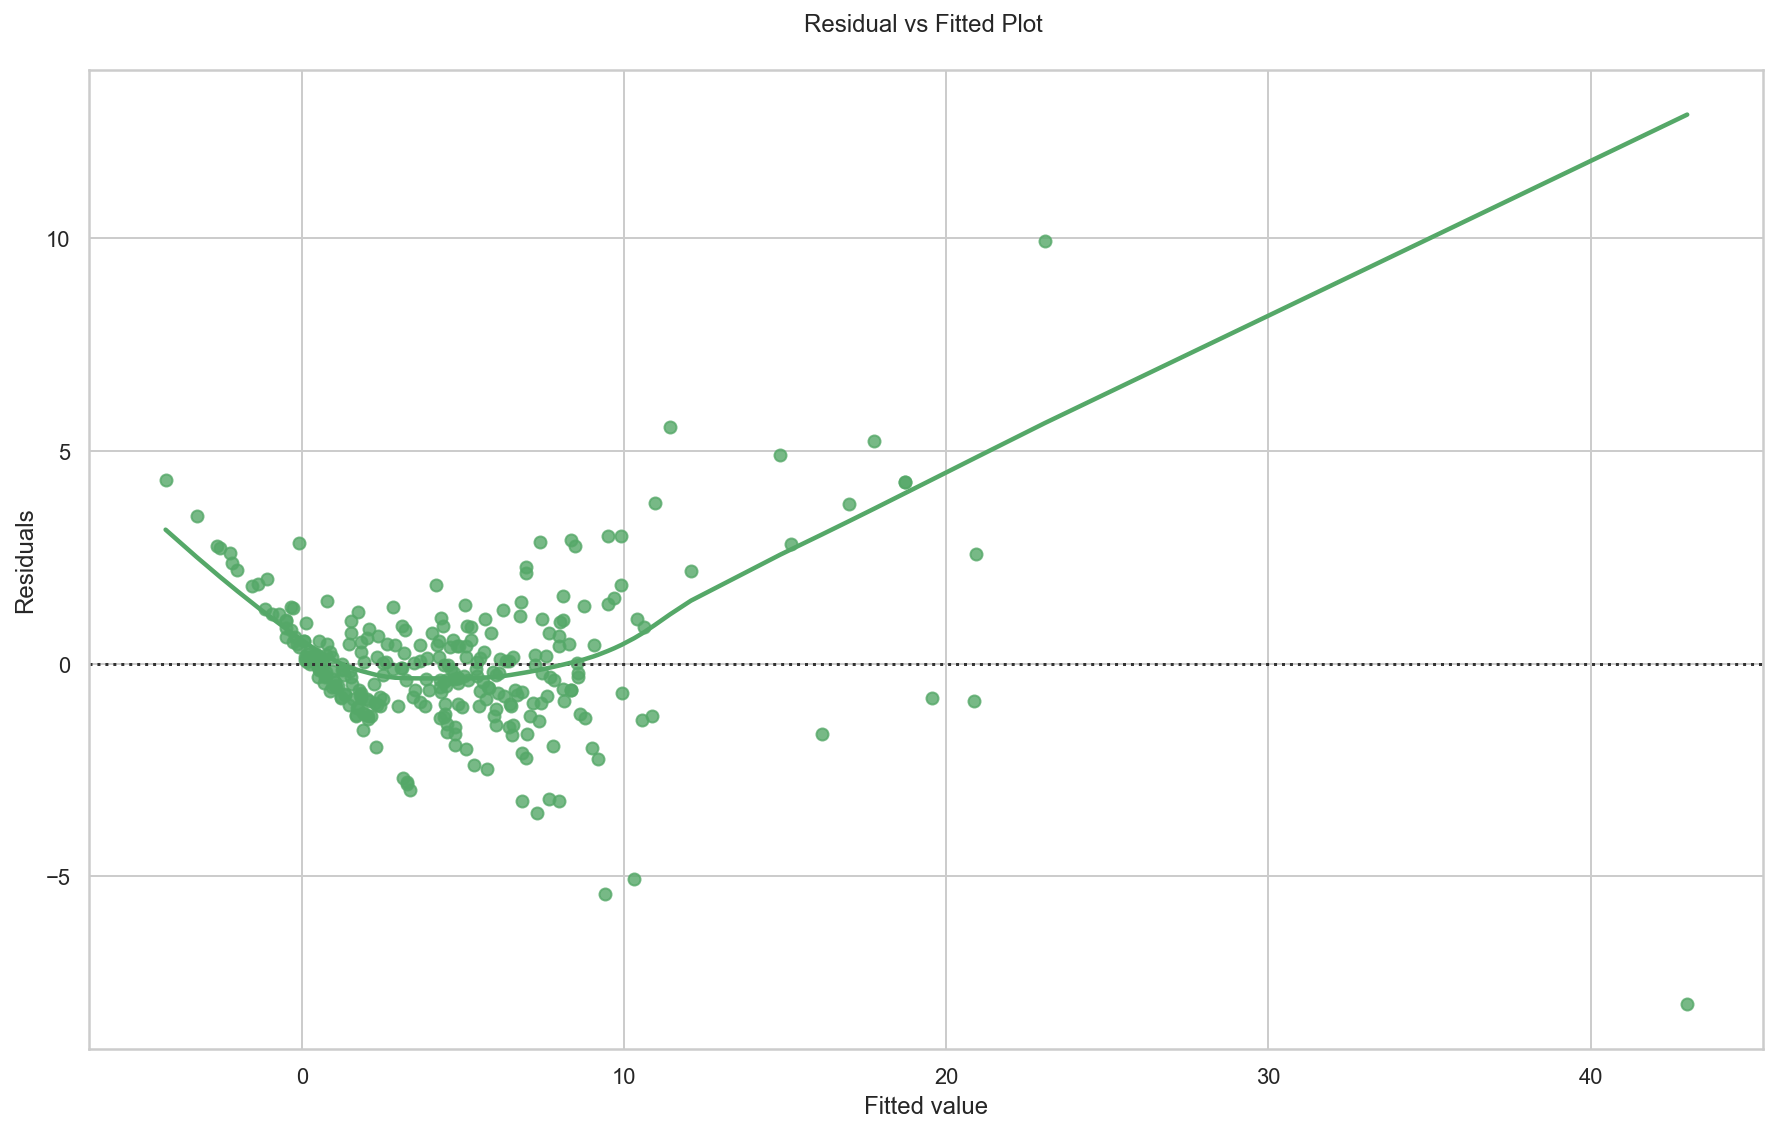

In [80]:
# Residual plot

sns.set(style = 'whitegrid')

cars1['predictions'] = model.predict(X_constant)
residuals = model.resid

ax = sns.residplot(cars1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [81]:
## for sqrt(X)

final_df = cars1.transform(lambda x: x**0.5)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,predictions
0,44.877611,1.830301,2.364318,164.316767,0.0,1.0,0.0,1.0,1.990852
1,44.866469,2.179449,3.088689,207.364414,0.0,0.0,0.0,1.0,2.638180
2,44.911023,2.692582,3.138471,83.066239,0.0,1.0,0.0,1.0,2.731701
3,44.844175,1.688194,2.037155,72.111026,0.0,1.0,0.0,1.0,1.800873
4,44.877611,2.144761,2.621068,206.033978,0.0,0.0,0.0,1.0,2.455944


In [82]:
X_final = final_df.drop(['Selling_Price','predictions'],axis=1)
y_final = final_df.Selling_Price
X_constant_final = sm.add_constant(X_final)
model_final = sm.OLS(y_final, X_constant_final).fit()
predictions_final = model_final.predict(X_constant_final)
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     804.0
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.42e-183
Time:                        12:16:37   Log-Likelihood:                 16.484
No. Observations:                 293   AIC:                            -16.97
Df Residuals:                     285   BIC:                             12.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -304.1845     26.943    -11.290      0.000    -357.218    -251.151
Year                       6.8001      0.599     11.344      0.000       5.620       7.980
Present_Price              0.6558      0.019     34.781      0.000       0.619       0.693
Kms_Driven                -0.0016      0.000     -5.052      0.000      -0.002      -0.001
Owner                      0.0367      0.076      0.485      0.628      -0.113       0.186
Fuel_Type_Petrol          -0.2689      0.040     -6.699      0.000      -0.348      -0.190
Seller_Type_Individual    -0.2641      0.047     -5.613      0.000      -0.357      -0.171
Transmission_Manual       -0.1000      0.045     -2.221      0.027      -0.189      -0.011
==============================================================================
Omnibus:                       14.674   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.062
Skew:                          -0.215   Prob(JB):                     2.97e-07
Kurtosis:                       4.509   Cond. No.                     3.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
#After transformating the data the accuracy/R2 score for the model improved.

#We can look further into the different regularization techniques with different values of alpha and build models

#The best R2 score that this model is giving is using these parameters

### Regularized Regression 

#### 1. Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

Instead of arbitrarily choosing alpha value ,it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV()

In [117]:
from sklearn.linear_model import RidgeCV,Ridge

alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas,normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.08148754173103201

The value of alpha that results in the smallest cross-validation error is 0.0814.

In [119]:
rr = Ridge(alpha = ridgecv.alpha_, normalize = True)
rr.fit(X_train, y_train)

Ridge(alpha=0.08148754173103201, normalize=True)

In [120]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))

Root Mean Squared Error: 2.04354646231782
r2_score: 0.7564859864371551


#### 2. Lasso Regression

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we'll use the Lasso() function; however, this time we'll need to include the argument max_iter = 10000. Other than that change, we proceed just as we did in fitting a ridge model:

In [123]:
from sklearn.linear_model import LassoCV,Lasso

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated score:

In [129]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.00033290967622077165, max_iter=10000, normalize=True)

The value of alpha that results in the smallest cross-validation error is 0.000332.

In [127]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, lasso.predict(X_test)))

Root Mean Squared Error: 2.151902612277087
r2_score: 0.7299773770623945


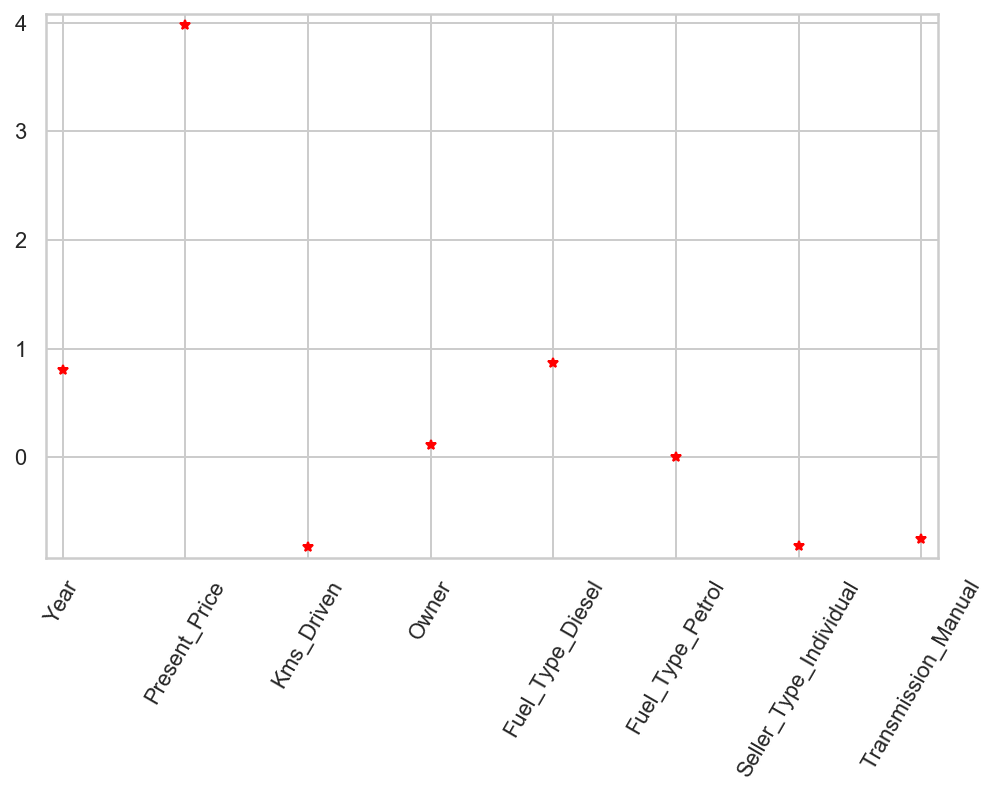

In [136]:
# Plot the coefficients
plt.figure(figsize=(8, 5))

colnames = X_train.columns

plt.plot(range(len(colnames)), lasso.coef_, linestyle='none',marker='*',markersize=5,color='red')
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

We can see that the Ridge model is performing better than the Lasso model.

#### 3. ElasticNet Regression

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [137]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

# how much importance should be given to l1 reguralization
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [138]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2000, n_jobs=-1, normalize=True)

In [139]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
#The amount of penalization chosen by cross validation

print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
#The compromise between l1 and l2 penalization chosen by cross validation

print('Number of iterations %d'%cv_model.n_iter_)
#number of iterations run by the coordinate descent solver to reach the specified tolerance for the optimal alpha.

Optimal alpha: 0.00108512
Optimal l1_ratio: 0.500
Number of iterations 25


In [140]:
# train model with best parameters from CV
elastic = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0010851196453481816, max_iter=25, normalize=True)

In [141]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elastic.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, elastic.predict(X_test)))

Root Mean Squared Error: 2.005172333877088
r2_score: 0.7655456290276874


Out of the 3 regularization models the Elastic Net Model is performing the best on this dataset.